In [58]:
import os

folder = "/home/sfischer/Documents/projects/wk_LinProg/simulation/results/log_raw"
txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]

if len(txt_files) == 0:
    raise FileNotFoundError("No .txt files found in the folder.")

# Select the first .txt file found
selected_file = txt_files[3]
print(f"Using file: {selected_file}")

Using file: log_LinProg_opt_test_rep50_link576_Opt_NoC_1_Comp_0.1_scratch10000_comp1.txt


In [59]:

import pandas as pd
import re
data = []
data_sending = []
file_path = os.path.join(folder, selected_file)
with open(file_path, 'r') as f:

    for line in f:
        if "compute time" in line:
            numbers = re.findall(r'\d+', line)
            # print(f"Found numbers: {numbers}")

            # Assigning numbers to variables based on their position
            timestamp = int(numbers[0])
            accel=int(numbers[1])
            src_task = int(numbers[2])
            dst_task = int(numbers[3])
            compute_time = int(numbers[4])
            from_time = int(numbers[5])
            to_time = int(numbers[6])
            # print(line)
            # print(f"timestamp: {timestamp}")
            # print(f"src_task: {src_task}")
            # print(f"dst_task: {dst_task}")
            # print(f"compute_time: {compute_time}")
            # print(f"from_time: {from_time}")
            # print(f"to_time: {to_time}")
            data.append([timestamp,accel, src_task, dst_task, compute_time, from_time, to_time])

        if "sending delay" in line:
            numbers = re.findall(r'\d+', line)
            # print(f"Found numbers: {numbers}")

            # Assigning numbers to variables based on their position
            timestamp = int(numbers[0])
            accel=int(numbers[1])
            src_task = int(numbers[2])
            dst_task = int(numbers[3])
            sending_time = int(numbers[4])
            busy_time = int(numbers[5])
            from_time = int(numbers[6])
            to_time = int(numbers[7])
            print(line)
            print(f"timestamp: {timestamp}")
            print(f"src_task: {src_task}")
            print(f"dst_task: {dst_task}")
            print(f"sending_time: {sending_time}")
            print(f"busy_time: {busy_time}")
            print(f"from_time: {from_time}")
            print(f"to_time: {to_time}")
            data_sending.append([timestamp,accel, src_task, dst_task, sending_time,busy_time, from_time, to_time])

df_data = pd.DataFrame(data, columns=["timestamp","accel", "src_task", "dst_task", "compute_time", "from_time", "to_time"])
print(df_data)
df_data_sending = pd.DataFrame(data_sending, columns=["timestamp","accel", "src_task", "dst_task", "sending_time", "busy_time", "from_time", "to_time"])
print(df_data_sending)

101981000: system.SysXelerator4: src task: 77 to dst task: 62 waited for sending delay time 0 and busy until: 0 from 101981 to 101981

timestamp: 101981000
src_task: 77
dst_task: 62
sending_time: 0
busy_time: 0
from_time: 101981
to_time: 101981
101981000: system.SysXelerator4: src task: 95 to dst task: 64 waited for sending delay time 0 and busy until: 0 from 101981 to 101981

timestamp: 101981000
src_task: 95
dst_task: 64
sending_time: 0
busy_time: 0
from_time: 101981
to_time: 101981
101981000: system.SysXelerator0: src task: 76 to dst task: 53 waited for sending delay time 0 and busy until: 0 from 101981 to 101981

timestamp: 101981000
src_task: 76
dst_task: 53
sending_time: 0
busy_time: 0
from_time: 101981
to_time: 101981
101981000: system.SysXelerator0: src task: 94 to dst task: 57 waited for sending delay time 0 and busy until: 0 from 101981 to 101981

timestamp: 101981000
src_task: 94
dst_task: 57
sending_time: 0
busy_time: 0
from_time: 101981
to_time: 101981
101981000: system.Sy

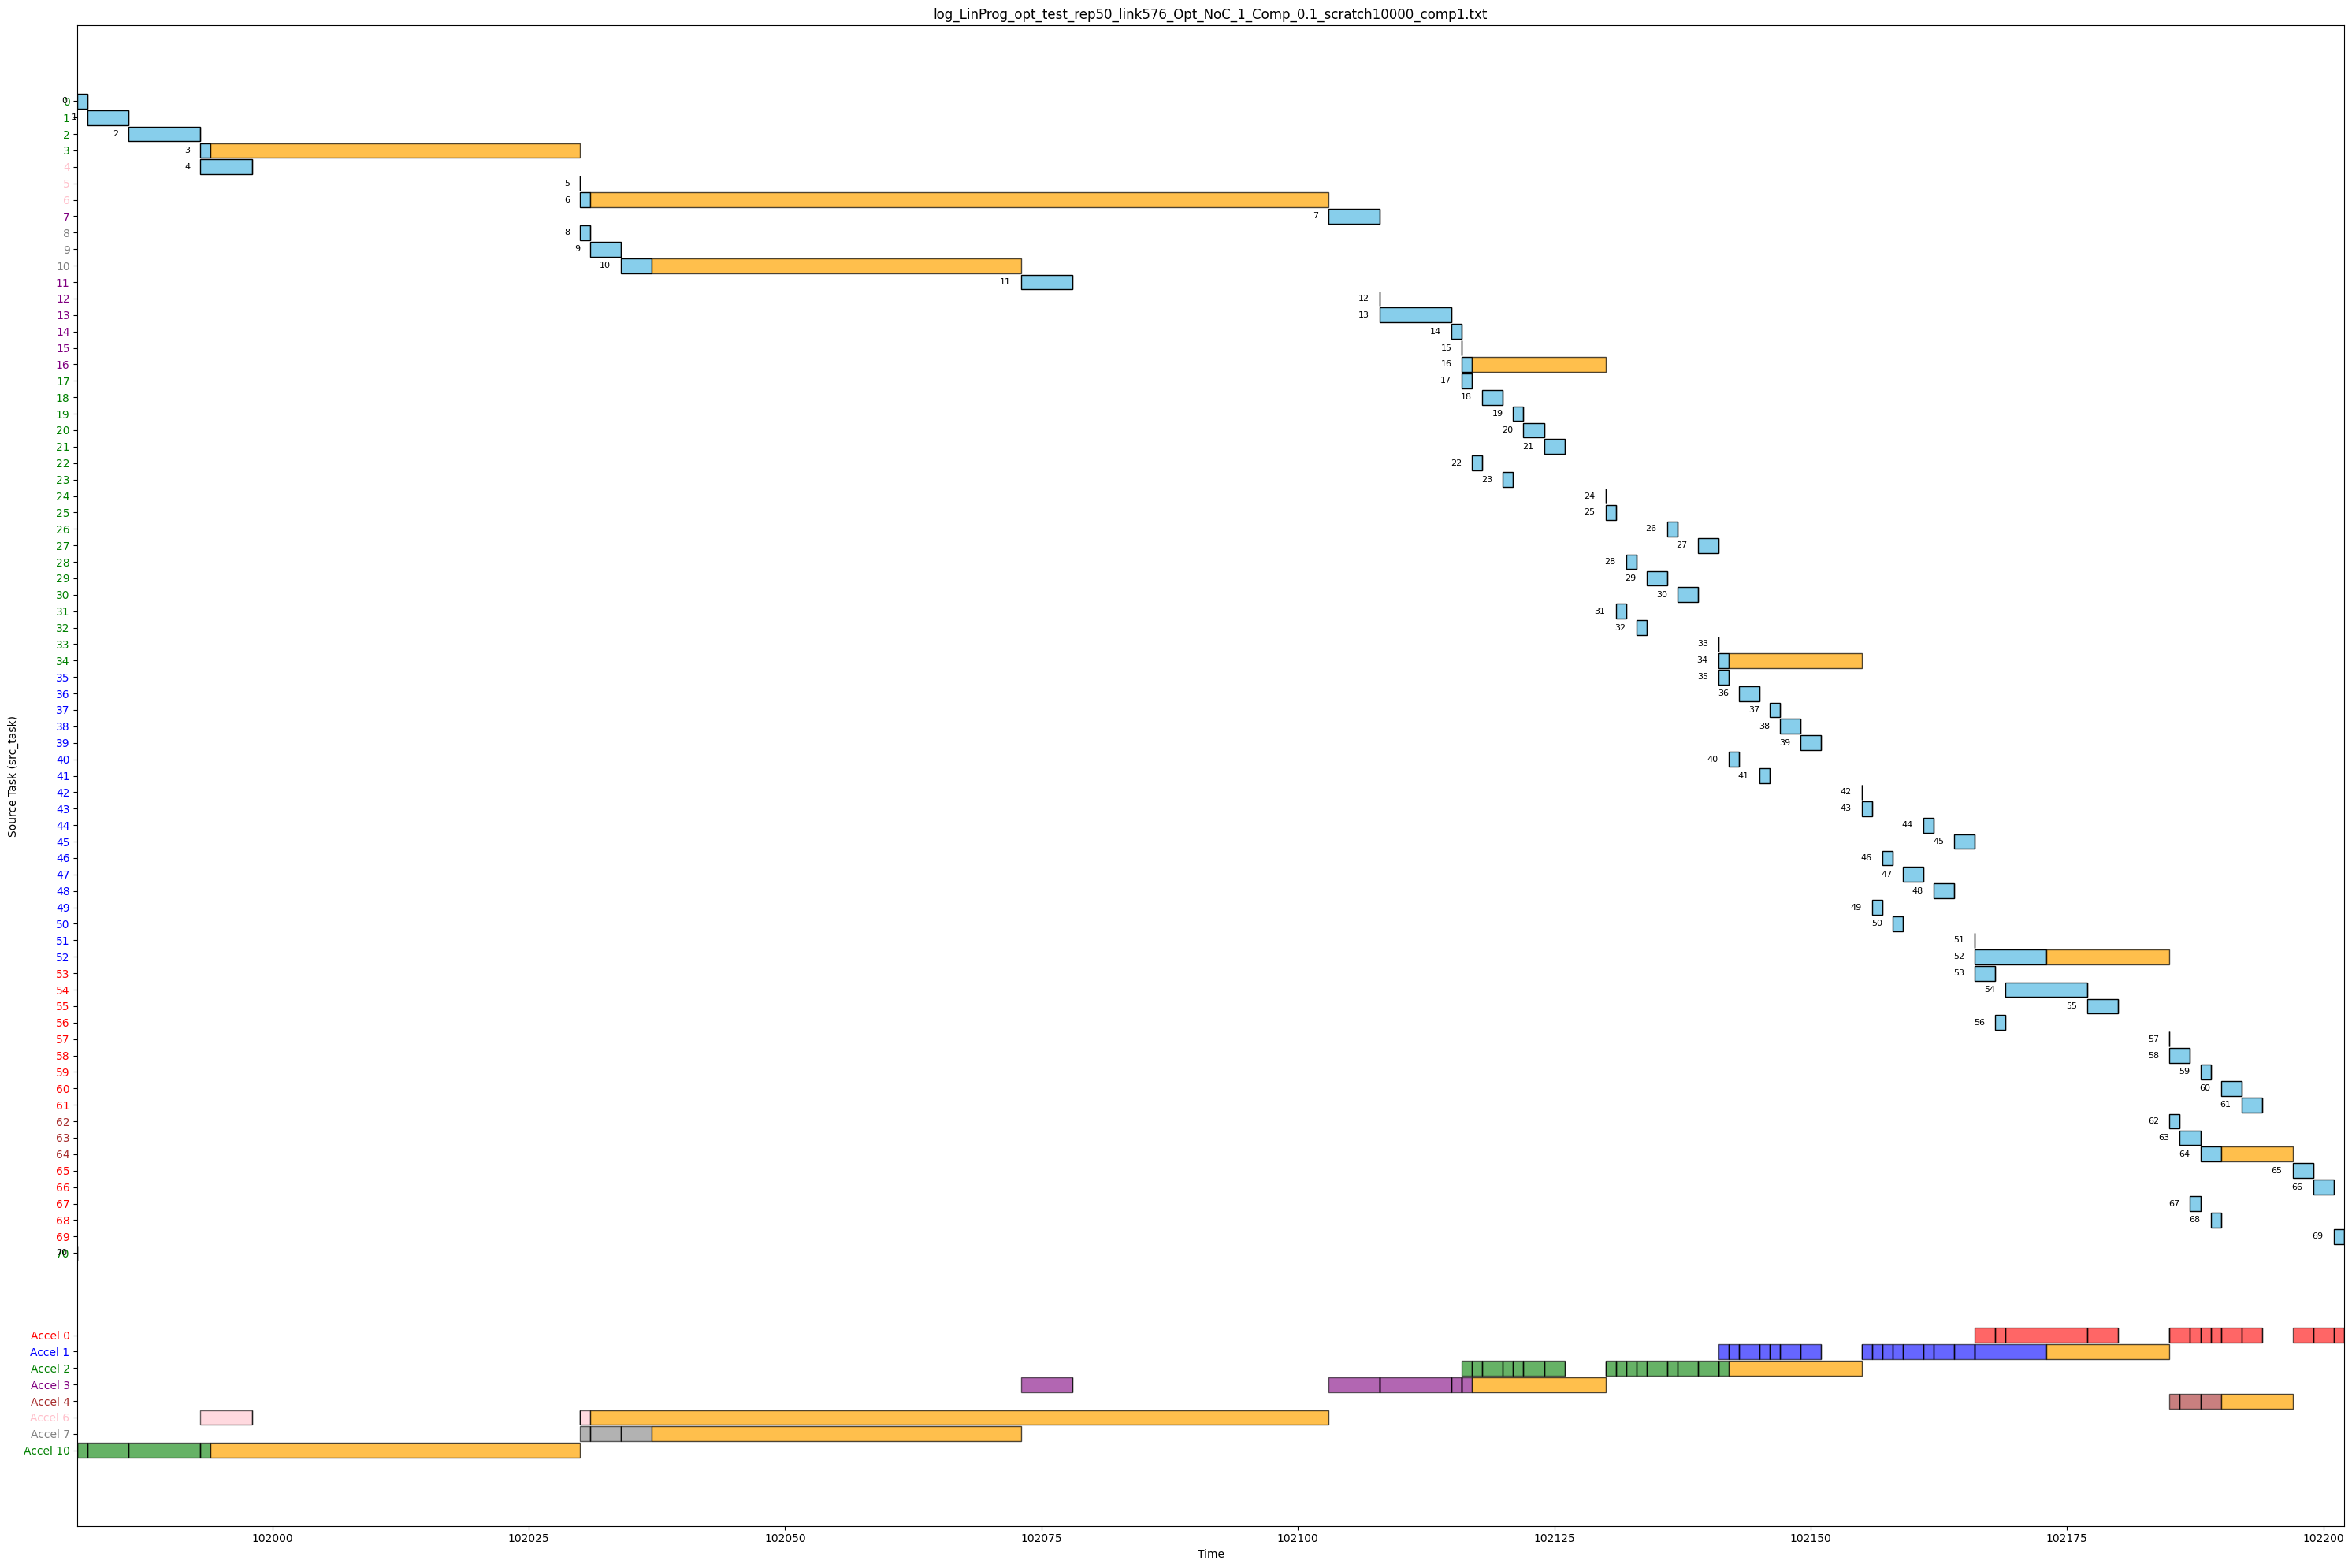

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Filter to only show src_task up to 70
df_filtered = df_data[df_data['src_task'] <= 70]
df_sending_filtered = df_data_sending[df_data_sending['src_task'] <= 70]

# Remove duplicate src_task and dst_task combinations, keeping only the first occurrence
df_filtered = df_filtered.drop_duplicates(subset=['src_task', 'dst_task'], keep='first')
df_sending_filtered = df_sending_filtered.drop_duplicates(subset=['src_task', 'dst_task'], keep='first')

fig, ax = plt.subplots(figsize=(30, 20))

# Define colors for different accelerators
accel_colors = ['red', 'blue', 'green', 'purple', 'brown', 'orange', 'pink', 'gray']

# Create a mapping of src_task to accel for coloring y-axis labels
task_to_accel = df_filtered.set_index('src_task')['accel'].to_dict()

# Plot compute times (main bars)
for idx, row in df_filtered.iterrows():
    ax.barh(
        y=row['src_task'],
        width=row['to_time'] - row['from_time'],
        left=row['from_time'],
        height=0.9,
        align='center',
        color='skyblue',
        edgecolor='black',
        label='Compute Time' if idx == 0 else ""
    )
    ax.text(
        row['from_time'] - 1,
        row['src_task'],
        str(row['src_task']),
        va='center',
        ha='right',
        fontsize=8
    )

# Plot sending times (overlay bars in a different color)
for idx, row in df_sending_filtered.iterrows():
    ax.barh(
        y=row['src_task'],
        width=row['to_time'] - row['from_time'],
        left=row['from_time'],
        height=0.9,
        align='center',
        color='orange',
        edgecolor='black',
        alpha=0.7,
        label='Sending Time' if idx == 0 else ""
    )

unique_accels = sorted(df_filtered['accel'].unique())
max_task = df_filtered['src_task'].max()
summary_y_start = max_task + 5  # Start summary rows after some gap
for i, accel in enumerate(unique_accels):
    # Get all tasks for this accelerator
    accel_compute_data = df_filtered[df_filtered['accel'] == accel]
    accel_sending_data = df_sending_filtered[df_sending_filtered['accel'] == accel]
    
    summary_y = summary_y_start + i
    color = accel_colors[accel % len(accel_colors)]
    
    # Collect intervals separately by type
    compute_intervals = []
    sending_intervals = []
    
    # Plot combined compute times for this accelerator
    for _, row in accel_compute_data.iterrows():
        interval = (row['from_time'], row['to_time'])
        compute_intervals.append(interval)
        
        ax.barh(
            y=summary_y,
            width=row['to_time'] - row['from_time'],
            left=row['from_time'],
            height=0.9,
            align='center',
            color=color,
            edgecolor='black',
            alpha=0.6
        )
    
    # Plot combined sending times for this accelerator
    for _, row in accel_sending_data.iterrows():
        interval = (row['from_time'], row['to_time'])
        sending_intervals.append(interval)
        
        ax.barh(
            y=summary_y,
            width=row['to_time'] - row['from_time'],
            left=row['from_time'],
            height=0.9,
            align='center',
            color='orange',
            edgecolor='black',
            alpha=0.7
        )
    
    # Check for overlaps (exclude sending-sending overlaps)
    overlaps = []
    
    # Check compute-compute overlaps
    for j in range(len(compute_intervals)):
        for k in range(j + 1, len(compute_intervals)):
            start1, end1 = compute_intervals[j]
            start2, end2 = compute_intervals[k]
            
            if start1 < end2 and start2 < end1:
                overlap_start = max(start1, start2)
                overlap_end = min(end1, end2)
                overlaps.append((overlap_start, overlap_end))
    
    # Check compute-sending overlaps
    for compute_interval in compute_intervals:
        for sending_interval in sending_intervals:
            start1, end1 = compute_interval
            start2, end2 = sending_interval
            
            if start1 < end2 and start2 < end1:
                overlap_start = max(start1, start2)
                overlap_end = min(end1, end2)
                overlaps.append((overlap_start, overlap_end))
    
    # Highlight overlapping regions with red hatching
    for overlap_start, overlap_end in overlaps:
        ax.barh(
            y=summary_y,
            width=overlap_end - overlap_start,
            left=overlap_start,
            height=0.9,
            align='center',
            color='red',
            edgecolor='red',
            alpha=0.8,
            hatch='///',
            label='Overlap' if i == 0 and len(overlaps) > 0 else ""
        )
    
    # Add text indicator for overlaps
    if overlaps:
        all_intervals = compute_intervals + sending_intervals
        ax.text(
            max(all_intervals, key=lambda x: x[1])[1] + 50,  # Position after the last bar
            summary_y,
            f'⚠ {len(overlaps)} overlaps',
            va='center',
            ha='left',
            fontsize=10,
            fontweight='bold',
            color='red'
        )


ax.set_xlabel('Time')
ax.set_ylabel('Source Task (src_task)')
ax.set_title(selected_file)

# Set y-axis ticks and color them based on accelerator
yticks = sorted(df_filtered['src_task'].unique())
# Add summary row ticks
summary_ticks = [summary_y_start + i for i in range(len(unique_accels))]
all_ticks = yticks + summary_ticks

ax.set_yticks(all_ticks)
tick_labels = [str(tick) for tick in yticks] + [f'Accel {accel}' for accel in unique_accels]
ax.set_yticklabels(tick_labels)

# Color the y-axis tick labels based on accelerator
for i, tick in enumerate(yticks):
    accel = task_to_accel.get(tick, 0)
    color = accel_colors[accel % len(accel_colors)]
    ax.get_yticklabels()[i].set_color(color)

# Color the summary row labels
for i, accel in enumerate(unique_accels):
    color = accel_colors[accel % len(accel_colors)]
    ax.get_yticklabels()[len(yticks) + i].set_color(color)

ax.invert_yaxis()

# Create legend for accelerators
legend_elements = []
for accel in unique_accels:
    color = accel_colors[accel % len(accel_colors)]
    legend_elements.append(mpatches.Patch(color=color, label=f'Accelerator {accel}'))

# Add original legend elements
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend_elements.extend(by_label.values())

# ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()

In [64]:
import json

# Create a dictionary to store task timing data
task_timing_data = {
    "tasks": [],
    "summary_accelerators": []
}

# Combine compute and sending tasks by task_id and accelerator
combined_tasks = {}

# Process compute tasks
for idx, row in df_filtered.iterrows():
    key = (int(row['src_task']), int(row['accel']))
    if key not in combined_tasks:
        combined_tasks[key] = {
            "task_id": int(row['src_task']),
            "accelerator": int(row['accel']),
            "compute_start": int(row['from_time']),
            "compute_end": int(row['to_time']),
            "sending_start": None,
            "sending_end": None
        }
    else:
        combined_tasks[key]["compute_start"] = int(row['from_time'])
        combined_tasks[key]["compute_end"] = int(row['to_time'])

# Process sending tasks
for idx, row in df_sending_filtered.iterrows():
    key = (int(row['src_task']), int(row['accel']))
    if key not in combined_tasks:
        combined_tasks[key] = {
            "task_id": int(row['src_task']),
            "accelerator": int(row['accel']),
            "compute_start": None,
            "compute_end": None,
            "sending_start": int(row['from_time']),
            "sending_end": int(row['to_time'])
        }
    else:
        combined_tasks[key]["sending_start"] = int(row['from_time'])
        combined_tasks[key]["sending_end"] = int(row['to_time'])

# Create combined task entries
for key, task_data in combined_tasks.items():
    # Find the overall start and end times
    start_times = []
    end_times = []
    
    if task_data["compute_start"] is not None:
        start_times.append(task_data["compute_start"])
        end_times.append(task_data["compute_end"])
    
    if task_data["sending_start"] is not None:
        start_times.append(task_data["sending_start"])
        end_times.append(task_data["sending_end"])
    
    if start_times and end_times:
        overall_start = min(start_times)
        overall_end = max(end_times)
        
        task_timing_data["tasks"].append({
            "task_id": task_data["task_id"],
            "accelerator": task_data["accelerator"],
            "start_time": overall_start,
            "end_time": overall_end,
            "duration": overall_end - overall_start,
            "compute_start": task_data["compute_start"],
            "compute_end": task_data["compute_end"],
            "sending_start": task_data["sending_start"],
            "sending_end": task_data["sending_end"],
            "has_compute": task_data["compute_start"] is not None,
            "has_sending": task_data["sending_start"] is not None
        })

# Save summary accelerator data
for i, accel in enumerate(unique_accels):
    accel_tasks = [task for task in task_timing_data["tasks"] if task["accelerator"] == accel]
    
    # Collect all intervals for this accelerator
    all_intervals = []
    
    for task in accel_tasks:
        all_intervals.append({
            "start_time": task["start_time"],
            "end_time": task["end_time"],
            "task_id": task["task_id"],
            "duration": task["duration"]
        })
    
    # Calculate total time span for this accelerator
    all_times = []
    for interval in all_intervals:
        all_times.extend([interval['start_time'], interval['end_time']])
    
    task_timing_data["summary_accelerators"].append({
        "accelerator": int(accel),
        "intervals": all_intervals,
        "total_start_time": min(all_times) if all_times else 0,
        "total_end_time": max(all_times) if all_times else 0,
        "total_duration": max(all_times) - min(all_times) if all_times else 0,
        "task_count": len(accel_tasks)
    })

# Add metadata
all_start_times = [task["start_time"] for task in task_timing_data["tasks"]]
all_end_times = [task["end_time"] for task in task_timing_data["tasks"]]

task_timing_data["metadata"] = {
    "source_file": selected_file,
    "total_tasks": len(task_timing_data["tasks"]),
    "total_accelerators": len(unique_accels),
    "max_task_id": max([task["task_id"] for task in task_timing_data["tasks"]]) if task_timing_data["tasks"] else 0,
    "min_task_id": min([task["task_id"] for task in task_timing_data["tasks"]]) if task_timing_data["tasks"] else 0,
    "time_range": {
        "start": min(all_start_times) if all_start_times else 0,
        "end": max(all_end_times) if all_end_times else 0
    },
    "tasks_with_compute": sum(1 for task in task_timing_data["tasks"] if task["has_compute"]),
    "tasks_with_sending": sum(1 for task in task_timing_data["tasks"] if task["has_sending"]),
    "tasks_with_both": sum(1 for task in task_timing_data["tasks"] if task["has_compute"] and task["has_sending"])
}

# Save to JSON file
output_filename = f"gantt_timing_combined_{selected_file.replace('.txt', '.json')}"
output_path = os.path.join(folder, output_filename)

with open(output_path, 'w') as json_file:
    json.dump(task_timing_data, json_file, indent=2)

print(f"Combined task timing data saved to: {output_path}")
print(f"Total combined tasks: {len(task_timing_data['tasks'])}")
print(f"Tasks with compute: {task_timing_data['metadata']['tasks_with_compute']}")
print(f"Tasks with sending: {task_timing_data['metadata']['tasks_with_sending']}")
print(f"Tasks with both: {task_timing_data['metadata']['tasks_with_both']}")
print(f"Total accelerators: {len(task_timing_data['summary_accelerators'])}")

Combined task timing data saved to: /home/sfischer/Documents/projects/wk_LinProg/simulation/results/log_raw/gantt_timing_combined_log_LinProg_opt_test_rep50_link576_Opt_NoC_1_Comp_0.1_scratch10000_comp1.json
Total combined tasks: 71
Tasks with compute: 71
Tasks with sending: 71
Tasks with both: 71
Total accelerators: 8
